<a href="https://colab.research.google.com/github/MichaelDeyid/Ejercicios/blob/main/Ejercicios_cuadernos_2%2C3%2C4_Michael_Estacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIOS CUADERNO 2**

**Ejercicio**

* Pruebe otros valores de `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.  

Para este ejercicio se importó la librería de sympy y se crearon las variables simbólicas junto con la función trabajar.

In [17]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

 t⋅(1.0⋅ⅈ⋅ω + σ)
ℯ               

**Amplitud creciente:**
Se crea una variable en donde se determinan los valores de las varíables simbólicas con los que trabaja la función propuesta y para este caso con sigma mayor que cero para que la función sea creciente.
También se ajustaron los valores de t, desde un punto negativo solo para efectos de visualización.
Finalmente se reproduce la imagen tanto en el eje real como imaginario.

x(t)= exp(t*(1.0*I*omega + sigma))


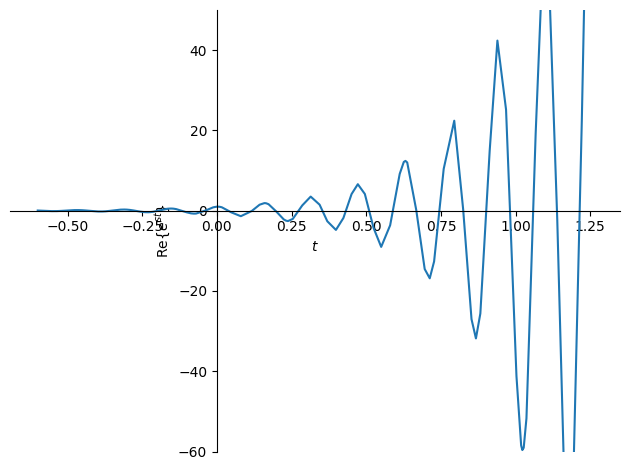

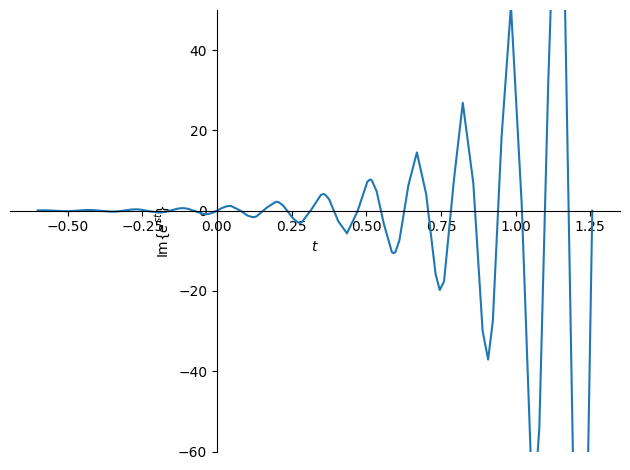

In [18]:
y = x.subs({omega: 40, sigma : 4})
print(r'x(t)=',x)
sym.plot(sym.re(y), (t, -0.6, 0.4*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-60,50])
sym.plot(sym.im(y), (t, -0.6, 0.4*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-60,50]);

**Amplitud decreciente:**
Se crea una variable en donde se determinan los valores de las varíables simbólicas con los que trabaja la función propuesta y para este caso con sigma menor que cero para que la función sea decreciente.
También se modifica el valor de t, desde cero hasta 0.4*pi solo para efectos de visualización.
Finalmente se reproduce la imagen tanto en el eje real como imaginario.

x(t)= exp(t*(1.0*I*omega + sigma))


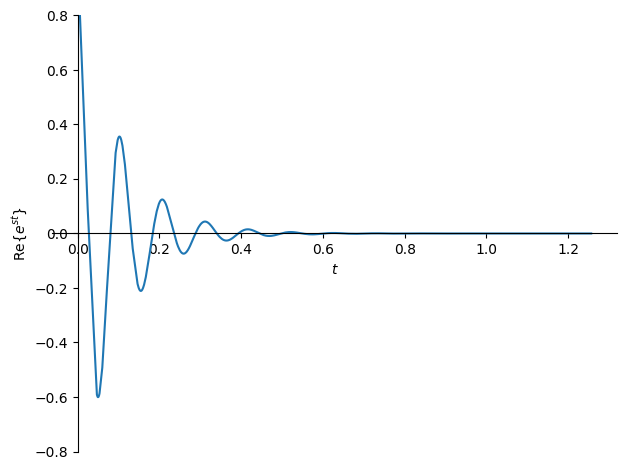

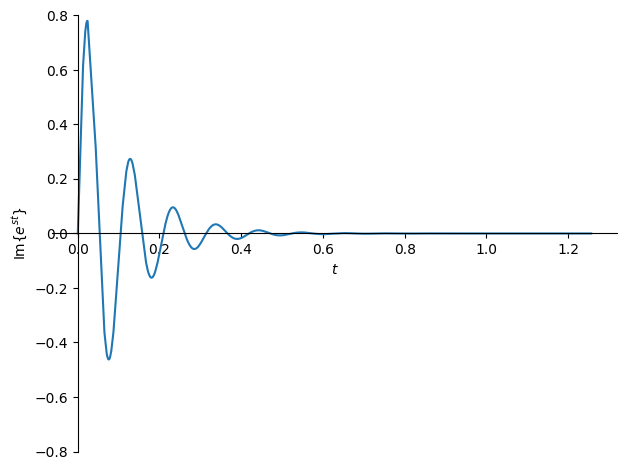

In [19]:
y = x.subs({omega: 60, sigma : -10})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 0.4*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-0.8,0.8])
sym.plot(sym.im(y), (t, 0, 0.4*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-0.8,0.8]);

**Amplitud constante:**
Se crea una variable en donde se determinan los valores de las varíables simbólicas con los que trabaja la función propuesta y para este caso con sigma igual a cero para que la función sea constante.
No se aplicaron cambios a t.
Finalmente se reproduce la imagen tanto en el eje real como imaginario.

x(t)= exp(t*(1.0*I*omega + sigma))


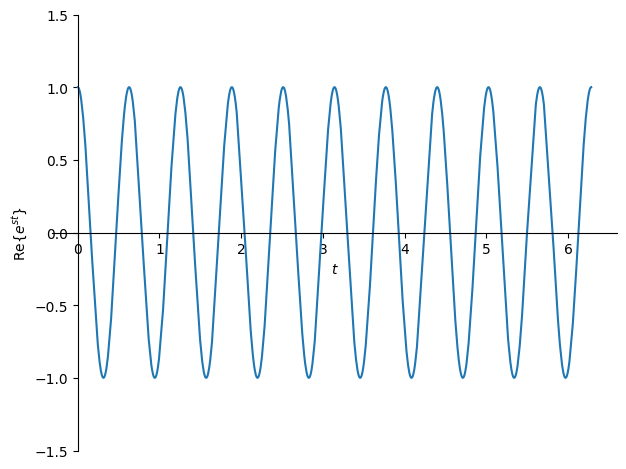

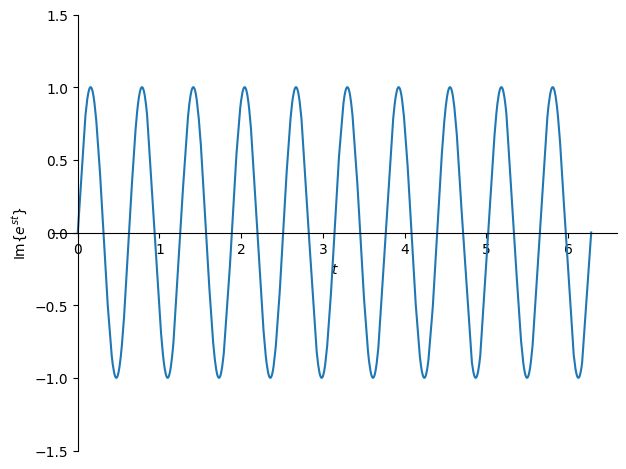

In [20]:
y = x.subs({omega: 10, sigma : 0})
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-1.5,1.5])
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-1.5,1.5]);

**Nota:** en cada caso se aplicaron diferentes frecuencias angulares como se solicita.

**Ejercicio**

* Compruebe la propiedad de selectividad, para un impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior.

Como se aprecia en el siguiente código, para comprobar la propiedad de selectividad primero se define a tau como una varíable simbólica y se crea la función g(t), luego se crea el impulso de Dirac desplazado con tau.
Finalmente se usa el función de integrar tomando como argumento el producto de las funciones creadas, se establece los límites de la variable t y listo.

In [21]:
tau = sym.symbols('tau', real=True)
g = sym.Function('g')(t)
delta_T = sym.DiracDelta(t-tau)
sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))


g(τ)

**Ejercicio**

* Use la función $\text{rect}(t)$ para construir una función $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$.

Para este ejercicio se crea la función rect, porque no está en la librería de sympy y se guarda para llamarla más adelante.

In [22]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

Luego, se crea una variable en donde se usa la función rect que ya se creó y la función que se va a construir y las multiplicamos para que dentro del rango que comparten estas funciones se construya la nueva función resultante, es decir que para valores que no compartan no habrá señal.
Finalmente para mostrar la imagen se ajusta a la frecuencia solicitada omega = 2

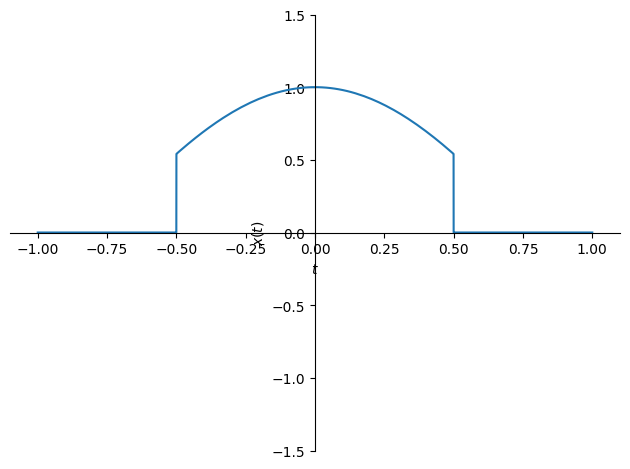

(-θ(t - 1/2) + θ(t + 1/2))⋅cos(ω⋅t)

In [23]:
x = sym.cos(omega*t) * rect(t)
sym.plot(x.subs(omega,2), (t, -1, 1), ylim=[-1.5, 1.5], ylabel=r'$x(t)$');
x

**Ejercicio**

Genere un rectificador de onda completa utilizando la función $\text{sgn}(t)$

Como se aprecia en el siguiente código, se utilizó una señal senoidal para hacer la rectificación de la onda completa, como esta señal es una función perteneciente a los reales, se puede representar el valor absoluto de esta señal senoidal con la función sgn(t), es decir reflejando la parte negativa a la positiva en el eje vertical.
La señal sgn(t) al evaluar el signo del argumento, en este caso como está plateado: de la función seno, construye una función casi rectangular que va a la par del seno y que al multiplicar valores negativos de la función seno con los mismos valores negativos de la señal sgn(t), se convertirán en positivos logrando generar el rectificador de onda.
Finalmente se grafica la variable  F que lleva el proceso.

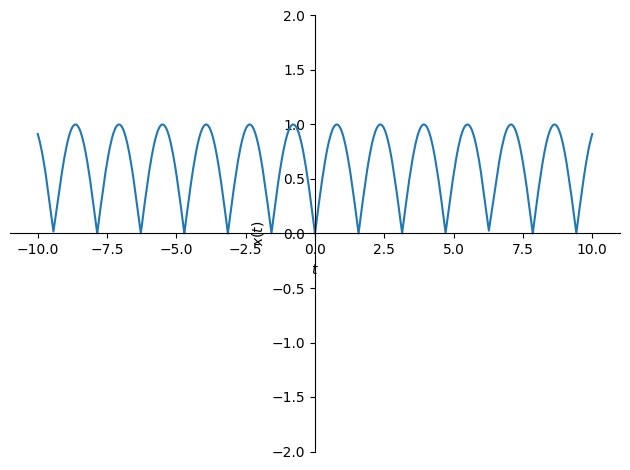

In [36]:
g = sym.sin(2*t)
F = g * sym.sign(g)
sym.plot(F, (t, -10, 10), ylim=[-2, 2], ylabel=r'$x(t)$');

**EJERCICIOS CUADERNO 3**

**Ejercicio**

* Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.

Para este ejercicio es necesario modificar la variable x sumándole un escalón más para que se acople a los demás escalones y respetando la relación de 1/3 que existe entre la distancia vertical de un escalón a otro, es por esto que se lo multiplica por 4/3 el pulso rectangular sumado, también en el argumento de este pulso se respeta la realción de longitud horizontal de cada escalón que es de 1 y es por esto que a t se le suma 0.5, para que esté a la mitad del primer t negativo y este se desplace t+1/2 y t-1/2 , es decir que vaya de 0 a -1.
Finalmente se muestra la imagen.

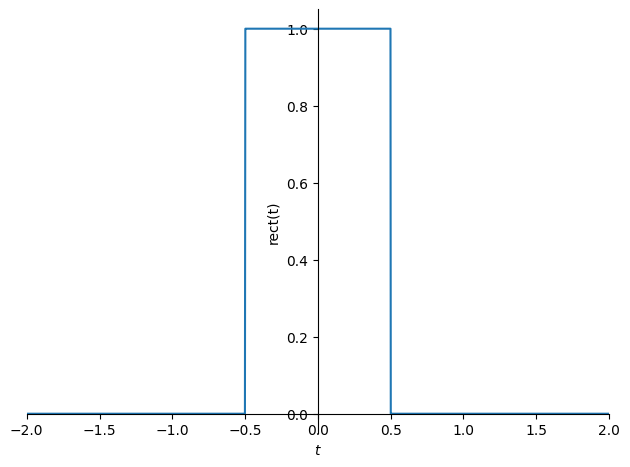

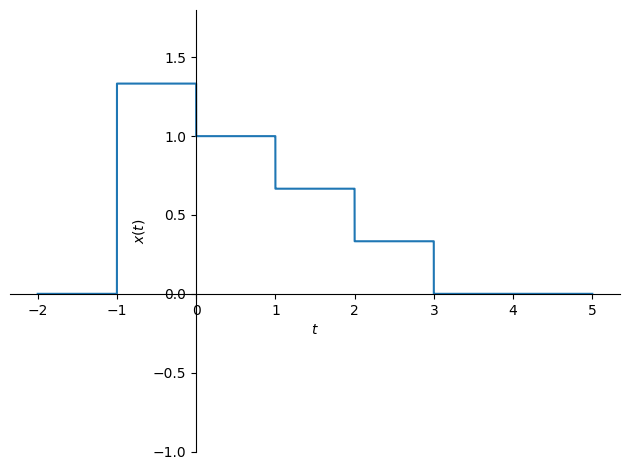

In [25]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)+4/3*rect.subs(t, t+0.5)
sym.plot(x, (t, -2, 5), ylim=[-1, 1.8], ylabel='$x(t)$');

**Ejercicio**

* Modifique el ejemplo anterior para que la señal se comprima.
* Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala `a`da como resultado un       estiramiento/compresión en este contexto?  


Se plantea el ejemplo anterior al que el ejericio se refiere

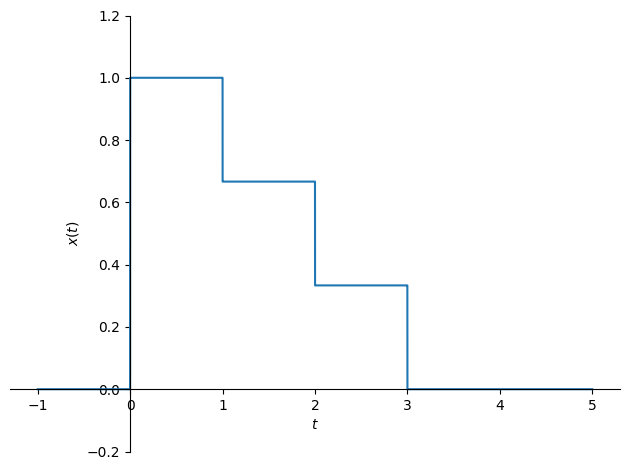

In [37]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

Acontinuación se define a "a" como una variable simbólica y se crea una varaible donde a la señal escalera se le defina como un escalamiento temporal, usando "a" como factor.
luego se muestran las dos señales en una gráfica para hacer la respectiva comparación, atribuyendole a "a" un valor mayor que 1 para que la señal se comprima.

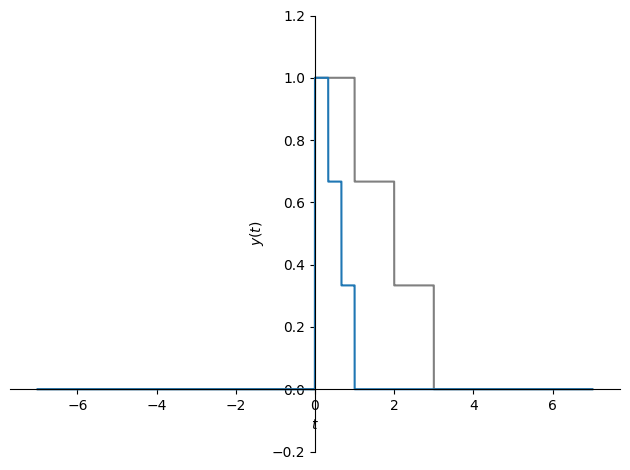

In [40]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,3), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

Del mismo modo que el anterior proceso de compresión, se crea la variable simbólica y se define la señal escalera como un escalamiento temporal conesta variable como  factor, pero ahora se reemplaza el valor de a por valores negativos, es decir para las a menores que cero, esto para que la señal se escale y se invierta.

Los factores de escala en este contexto son:


*   para compresion :   valores de a desde -infinito hasta -1 (sin tomar el -1) = [ -inf , -1)
*  Para estiramiento : valores de a desde -1 (sin tomarlo) hasta 0 (sin tomarlo) = ( -1 , 0)




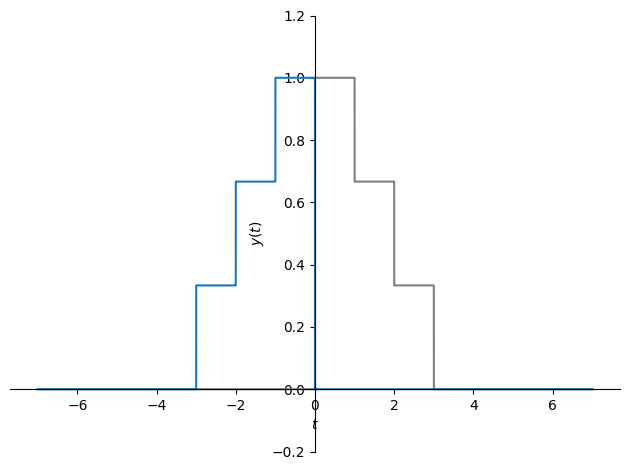

In [27]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,-1), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¿la señal comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

Para Tau = 0, la señal comienza en t = 0, como se puede apreciar en el siguiente código

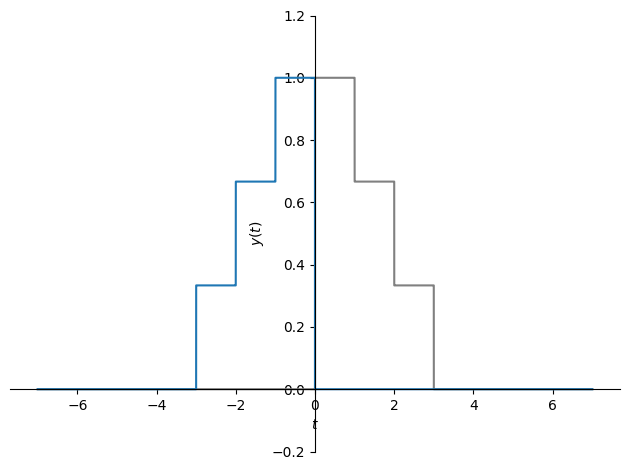

In [42]:
tau = 0
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()


Se realizó un cabio temporal en dos operaciones, primero invirtiendo la señal escalera, luego ya teniendo definido el valor de tau que será el desplazamiento, se define el desplazamiento temporal en otra variable aplicando la operación espejo e invirtiendo tau o en otras palabras multiplicando por -1 el argumento.
Finalmente se muestran las dos señales en una imagen para su comparación de desplazamiento.

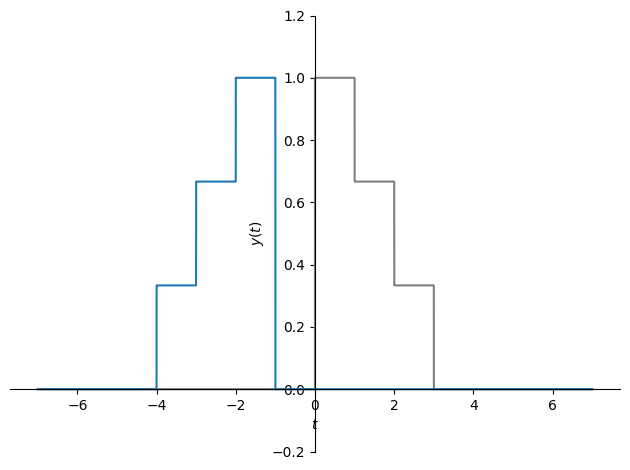

In [43]:
tau =-1
y = x.subs(t, -t)       #(i) Inversión temporal
h= y.subs(t, t - tau)   #(ii) Desplazamiento temporal.
px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(h, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**EJERCICIO CUADERNO 4**

### Ejercicio

El siguiente bloque de código permite graficar las primeras 50 muestras de la señal $x[n] = cos[2\pi fn]$ para diferentes valores de $f$.

Saque sus propias conclusiones de cómo afecta el valor de la frecuencia el periodo de la señal discreta.

In [30]:
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt, cos
import matplotlib.pyplot as plt
import ipywidgets
def senial(f):

  n = arange(0, 50)
  plt.figure(1, (25, 10))
  x = cos(2*pi*f*n)
  plt.stem(n, x, use_line_collection=True)
  plt.grid()
  plt.margins(x=.01)
  plt.title('Gráfica de la señal $x[n] = cos(2\pi \cdot {} \cdot n)$'.format(f), fontsize=15)
  plt.xlabel('Muestras')
  plt.show()
display(ipywidgets.interactive(senial, f=ipywidgets.FloatText(value=0, step=.1, description='Valor de f:')))

interactive(children=(FloatText(value=0.0, description='Valor de f:', step=0.1), Output()), _dom_classes=('wid…

Al analizar el anterior código donde se grafican las primeras 50 muestras de la señal discreta, se puede concluir que al varíar el parámetro de la frecuencia por valores decimales bajos, se tiene un periodo de reproducción de la señal más lago, es decir que la señal se verá más estirada a través del tiempo y gracias a esto el muestreo que se le realiza a esta señal es suficiente para notar que se trata de la función cosenoidal, en cuanto esta frecuencia va aumentando de igual manera en forma decimal, se puede apreciar que el muestreo es insuficiente para saber de que función se trata, esto debido a que al tener una frecuencia alta se tendrá un periodo más bajo o menor longitud entre ondas, lo que quiere decir que para un suiche será mas dificil capturar las muestras que representen la onda, por último cuando los valores de frecuencia son enteros se puede notar que el periodo en que se repite la señal es el mismo que el del intervalo de muestreo, es por esto que la señal discreta en estos valores se ve como constante, pero en realidad es porque no alcanza a captar muestras que están dentro de ese intervalo, es decir, que se repite la señal tan rápido que solo capta las muestras donde finaliza cada periodo.